<center><h1>Supplement S2 of</h1><h2>Categorical Perception of Fear and Anger Expressions in Whole,<br>Masked and Composite Faces.</h2></center>
<br>

# Get Data for Experiment 2 (Composite)

This file contains the full code to extract all information from the original logfiles, count the responses and create a table with the main results, which can be used in later analyses.

## import libraries

In [1]:
import fnmatch # filename matching
import os # navigating directories
import pickle # saving python objects to file

import numpy as np

import pandas as pd
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 1000)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## get list of logfiles

In [2]:
def getsubject(whichfolder, whichexperiment):
    #os.chdir(whichfolder)
    VpList = []
    for fileName in os.listdir(whichfolder):
        if fnmatch.fnmatch(fileName, whichexperiment):
            VpList.append(whichfolder+fileName)
    return VpList

In [3]:
IdentList = getsubject('./data/exp2/','*.log')
IdentList.sort()

for i in range(0,len(IdentList)):
    print str(i) + ":\t" + IdentList[i]

0:	./data/exp2/Vp001-Vp001_UpDown_Identification.log
1:	./data/exp2/Vp002-Vp002_UpDown_Identification.log
2:	./data/exp2/Vp003-Vp003_UpDown_Identification.log
3:	./data/exp2/Vp004-Vp004_UpDown_Identification.log
4:	./data/exp2/Vp005-Vp005_UpDown_Identification.log
5:	./data/exp2/Vp006-Vp006_UpDown_Identification.log
6:	./data/exp2/Vp007-Vp007_UpDown_Identification.log
7:	./data/exp2/Vp008-Vp008_UpDown_Identification.log
8:	./data/exp2/Vp009-Vp009_UpDown_Identification.log
9:	./data/exp2/Vp010-Vp010_UpDown_Identification.log
10:	./data/exp2/Vp011-Vp011_UpDown_Identification.log
11:	./data/exp2/Vp012-Vp012_UpDown_Identification.log
12:	./data/exp2/Vp013-Vp013_UpDown_Identification.log
13:	./data/exp2/Vp014-Vp014_UpDown_Identification.log
14:	./data/exp2/Vp015-Vp015_UpDown_Identification.log
15:	./data/exp2/Vp016-Vp016_UpDown_Identification.log
16:	./data/exp2/Vp017-Vp017_UpDown_Identification.log
17:	./data/exp2/Vp018-Vp018_UpDown_Identification.log
18:	./data/exp2/Vp019-Vp019_UpDown_Ide

# Get Responses

## Transform each row into dict entry

The logfiles have a legacy naming of the composite face conditions which is as follows:
- rating of upper half
 - lower half angry: low10 (as 10 is the number of the 100% angry face)
 - lower half fearful: low00 (as 0 is the number of the 0% angry / 100% fearful face)
- rating of lower half:
 - upper half angry: up10
 - upper half angry: up00

In [4]:
def get_ident_data(Vp):
    
    filename = open(Vp,'r')
    d = {'pt1': {'up10':{}, 'low10':{}, 'up00':{}, 'low00':{} },
         'pt2': {'up10':{}, 'low10':{}, 'up00':{}, 'low00':{} }} # basic conditions
    
    i = 1 # count of items
    
    pt_switch = 1
    r = 0
    for entry in filename:  
        # check if experiment part has changed
        if entry.find("pause") != -1: 
            pt_switch = 2
        
        # check if logfile row contains relevant information
        if entry.find("Morph") != -1:
            first = entry.split()[3] # name of target face
            second = entry.split()[5] # name of mask face
            resp = entry.split()[-2] # respose given
            
            # get condition
            if second.find("10_UPPER") != -1:
                cond = 'up10'
            if second.find("10_LOWER") != -1:
                cond = 'low10'
            if second.find("00_UPPER") != -1:
                cond = 'up00'
            if second.find("00_LOWER") != -1:
                cond = 'low00' 
                
            # write to dict
            if pt_switch == 1:
                d['pt1'][cond]["item_" + str(i)] = {"target": first, "mask": second, "resp": resp, "rt": 0.0}
            if pt_switch == 2:
                d['pt2'][cond]["item_" + str(i)] = {"target": first, "mask": second, "resp": resp, "rt": 0.0}
            i += 1
            r += 1
        
        if entry.find('Response') != -1 and i > 1 and r == 1:
            rt = float(entry.split()[-2])/10 # ms
            # write to dict
            if pt_switch == 1:
                d['pt1'][cond]["item_" + str(i-1)]['rt'] = rt
                r = 0
            if pt_switch == 2:
                d['pt2'][cond]["item_" + str(i-1)]['rt'] = rt
                r = 0
            
    return d

Example:

In [5]:
mydict = get_ident_data(IdentList[0])
mydict['pt1']['low00']['item_1']

{'mask': 'MorphM2_00_LOWER.jpg',
 'resp': 'hit',
 'rt': 25198.8,
 'target': 'MorphM2_07_orig.jpg'}

## Count the hits for all morphing grades of a certain condition

In [6]:
def get_ident_morphs(d,pt,cond):
    morphs = ['_00_','_01_','_02_','_03_','_04_','_05_','_06_','_07_','_08_','_09_','_10_']
    d_names = ['m00','m01','m02','m03','m04','m05','m06','m07','m08','m09','m10']
    d_count = {'m00':{},'m01':{},'m02':{},'m03':{},'m04':{},'m05':{},'m06':{},'m07':{},'m08':{},'m09':{},'m10':{}}
    j = 0
    for m in morphs:
        i = 0
        for entry in d[pt][cond]:
            if d[pt][cond][entry]['target'].find(m) != -1:
                if d[pt][cond][entry]['resp'] == 'hit':
                    i += 1
        d_count[d_names[j]] = i
        j += 1
    return d_count

## Count hits for all conditions

In [7]:
def get_ident_cond(d,pt):
    d_conds = {'up10':{}, 'low10':{}, 'up00':{}, 'low00':{} }
    d_names = ['up10','low10','up00','low00']
    i = 0
    for c in d_names:
        d_conds[d_names[i]] = get_ident_morphs(d,pt,d_names[i])
        i += 1
    return d_conds      

Example:

In [8]:
get_ident_cond(mydict,'pt1')

{'low00': {'m00': 4,
  'm01': 6,
  'm02': 10,
  'm03': 7,
  'm04': 12,
  'm05': 10,
  'm06': 12,
  'm07': 15,
  'm08': 16,
  'm09': 16,
  'm10': 17},
 'low10': {'m00': 7,
  'm01': 9,
  'm02': 6,
  'm03': 12,
  'm04': 7,
  'm05': 11,
  'm06': 13,
  'm07': 15,
  'm08': 15,
  'm09': 15,
  'm10': 19},
 'up00': {'m00': 7,
  'm01': 4,
  'm02': 6,
  'm03': 8,
  'm04': 7,
  'm05': 9,
  'm06': 8,
  'm07': 9,
  'm08': 9,
  'm09': 11,
  'm10': 12},
 'up10': {'m00': 9,
  'm01': 8,
  'm02': 10,
  'm03': 12,
  'm04': 11,
  'm05': 11,
  'm06': 12,
  'm07': 11,
  'm08': 15,
  'm09': 12,
  'm10': 15}}

## Count Hits for both parts

In [9]:
def get_ident_parts(d):
    pt1 = get_ident_cond(d,'pt1')
    pt2 = get_ident_cond(d,'pt2')
    return pt1,pt2

## Transform into Pandas Data Frame

00 --> fear<br>
10 --> anger

In [10]:
def make_ident_df(d):
    pt1_df = pd.DataFrame(get_ident_parts(d)[0])/20.*100 # transformation into percent
    pt2_df = pd.DataFrame(get_ident_parts(d)[1])/20.*100
    pt1_df.columns = ["fear_low", "anger_low","fear_high","anger_high" ]
    pt2_df.columns = ["fear_low", "anger_low","fear_high","anger_high" ]
    avg_df = (pt1_df + pt2_df)/2
    return pt1_df, pt2_df, avg_df

In [11]:
pt1,pt2,avg = make_ident_df(get_ident_data(IdentList[0]))

Example:

In [12]:
avg

,fear_low,anger_low,fear_high,anger_high
m00,15.0,25.0,35.0,57.5
m01,25.0,32.5,32.5,42.5
m02,42.5,32.5,42.5,55.0
m03,40.0,45.0,40.0,57.5
m04,42.5,37.5,42.5,62.5
m05,50.0,52.5,45.0,50.0
m06,55.0,62.5,42.5,57.5
m07,62.5,67.5,42.5,57.5
m08,77.5,75.0,45.0,67.5
m09,77.5,75.0,52.5,60.0


## Do This for all Participants

In [13]:
def make_ident_sample(VpList):
    # make the first subject to establish the df-structure
    pt1_df, pt2_df, avg_df = make_ident_df(get_ident_data(VpList[0]))
    pt1_df.index = [["p001"]*len(pt1_df), pt1_df.index ]
    pt2_df.index = [["p001"]*len(pt2_df), pt2_df.index ]
    avg_df.index = [["p001"]*len(avg_df), avg_df.index ]
    
    # make the rest of the sample
    for vp_nr in range(1,len(VpList)):
        vp_pt1,vp_pt2,vp_avg = make_ident_df(get_ident_data(VpList[vp_nr]))
        # get the naming of the subject right
        if vp_nr < 10-1:
            vp_pt1.index = [["p00"+str(vp_nr+1) ]*len(vp_pt1), vp_pt1.index ]
            vp_pt2.index = [["p00"+str(vp_nr+1) ]*len(vp_pt2), vp_pt2.index ]
            vp_avg.index = [["p00"+str(vp_nr+1) ]*len(vp_avg), vp_avg.index ]
        if vp_nr >=10-1:
            vp_pt1.index = [[ "p0"+str(vp_nr+1) ]*len(vp_pt1), vp_pt1.index ]
            vp_pt2.index = [[ "p0"+str(vp_nr+1) ]*len(vp_pt2), vp_pt2.index ]
            vp_avg.index = [[ "p0"+str(vp_nr+1) ]*len(vp_avg), vp_avg.index ]
        # add this subject to sample-df
        pt1_df = pd.concat([pt1_df,vp_pt1])
        pt2_df = pd.concat([pt2_df,vp_pt2])
        avg_df = pd.concat([avg_df,vp_avg])
    # finalising the df
    pt1_df.index.names = ['p','grade']
    pt2_df.index.names = ['p','grade']
    avg_df.index.names = ['p','grade']
    
    pt1_df.columns = ['fearLOW','angerLOW','fearUP','angerUP']
    pt2_df.columns = ['fearLOW','angerLOW','fearUP','angerUP']
    avg_df.columns = ['fearLOW','angerLOW','fearUP','angerUP']
    
    return pt1_df, pt2_df, avg_df

In [14]:
pt1_df, pt2_df, avg_df = make_ident_sample(IdentList)
avg_df

fearLOW  angerLOW  fearUP  angerUP
p    grade                                    
p001 m00       15.0      25.0    35.0     57.5
     m01       25.0      32.5    32.5     42.5
     m02       42.5      32.5    42.5     55.0
     m03       40.0      45.0    40.0     57.5
     m04       42.5      37.5    42.5     62.5
     m05       50.0      52.5    45.0     50.0
     m06       55.0      62.5    42.5     57.5
     m07       62.5      67.5    42.5     57.5
     m08       77.5      75.0    45.0     67.5
     m09       77.5      75.0    52.5     60.0
     m10       80.0      87.5    50.0     70.0
p002 m00       40.0      27.5    40.0     67.5
     m01       27.5      52.5    40.0     72.5
     m02       57.5      52.5    40.0     80.0
     m03       42.5      52.5    35.0     72.5
     m04       52.5      60.0    50.0     67.5
     m05       50.0      57.5    42.5     72.5
     m06       60.0      75.0    42.5     77.5
     m07       87.5      87.5    45.0     82.5
     m08       80.0      67.5    47.5     85.0
     m09       85.0      82.5    47.5     95.0
     m10       87.5      82.5    50.0     90.0
p003 m00       10.0      22.5    32.5     62.5
     m01        7.5      10.0    30.0     65.0
     m02       15.0      22.5    35.0     52.5
     m03       10.0      20.0    30.0     60.0
     m04       12.5      40.0    32.5     67.5
     m05       35.0      57.5    42.5     62.5
     m06       52.5      82.5    45.0     57.5
     m07       65.0      85.0    57.5     70.0
     m08       90.0      92.5    47.5     72.5
     m09       90.0      95.0    52.5     67.5
     m10       97.5      95.0    52.5     75.0
p004 m00       12.5      35.0    37.5     57.5
     m01       17.5      37.5    22.5     65.0
     m02       17.5      47.5    37.5     60.0
     m03       25.0      60.0    42.5     60.0
     m04       25.0      57.5    45.0     70.0
     m05       35.0      55.0    47.5     75.0
     m06       45.0      65.0    60.0     85.0
     m07       60.0      65.0    55.0     82.5
     m08       42.5      77.5    62.5     85.0
     m09       52.5      85.0    50.0     85.0
     m10       60.0      85.0    57.5     80.0
p005 m00        2.5      17.5     5.0     92.5
     m01       12.5      22.5     5.0     90.0
     m02       17.5      20.0     7.5     90.0
     m03       20.0      25.0     7.5     95.0
     m04       25.0      42.5    15.0     92.5
     m05       35.0      55.0    12.5     95.0
     m06       52.5      70.0    12.5     92.5
     m07       70.0      90.0    20.0     92.5
     m08       82.5      92.5    22.5     97.5
     m09       77.5      92.5    15.0    100.0
     m10       92.5      97.5    10.0    100.0
p006 m00       40.0      32.5    37.5     62.5
     m01       32.5      35.0    45.0     72.5
     m02       42.5      37.5    47.5     60.0
     m03       37.5      42.5    60.0     65.0
     m04       50.0      57.5    52.5     60.0
     m05       50.0      60.0    40.0     77.5
     m06       52.5      65.0    55.0     57.5
     m07       65.0      72.5    67.5     77.5
     m08       75.0      67.5    50.0     67.5
     m09       65.0      77.5    50.0     72.5
     m10       77.5      97.5    37.5     67.5
p007 m00       17.5      30.0    25.0     92.5
     m01       22.5      37.5    17.5     85.0
     m02       22.5      32.5    30.0     82.5
     m03       25.0      32.5    20.0     90.0
     m04       22.5      37.5    22.5     87.5
     m05       30.0      45.0    25.0     85.0
     m06       50.0      67.5    20.0     95.0
     m07       55.0      90.0    37.5     87.5
     m08       72.5      80.0    30.0     92.5
     m09       77.5      82.5    35.0     92.5
     m10       85.0      82.5    37.5     85.0
p008 m00       22.5      22.5    37.5     62.5
     m01       25.0      30.0    42.5     57.5
     m02       27.5      35.0    30.0     70.0
     m03       30.0      42.5    42.5     65.0
     m04       32.5      60.0    52.5     70.0
     m05       40.0      65.0    45.0     77.5
     m06       50

## Transform Table for within-subject analysis

In [15]:
avg_between_df = avg_df.unstack("grade")
pt1_between_df = pt1_df.unstack("grade")
pt2_between_df = pt2_df.unstack("grade")
avg_between_df

fearLOW                                                                \
grade     m00   m01   m02   m03   m04   m05   m06   m07   m08    m09    m10   
p                                                                             
p001     15.0  25.0  42.5  40.0  42.5  50.0  55.0  62.5  77.5   77.5   80.0   
p002     40.0  27.5  57.5  42.5  52.5  50.0  60.0  87.5  80.0   85.0   87.5   
p003     10.0   7.5  15.0  10.0  12.5  35.0  52.5  65.0  90.0   90.0   97.5   
p004     12.5  17.5  17.5  25.0  25.0  35.0  45.0  60.0  42.5   52.5   60.0   
p005      2.5  12.5  17.5  20.0  25.0  35.0  52.5  70.0  82.5   77.5   92.5   
p006     40.0  32.5  42.5  37.5  50.0  50.0  52.5  65.0  75.0   65.0   77.5   
p007     17.5  22.5  22.5  25.0  22.5  30.0  50.0  55.0  72.5   77.5   85.0   
p008     22.5  25.0  27.5  30.0  32.5  40.0  50.0  50.0  60.0   65.0   72.5   
p009     42.5  35.0  40.0  40.0  62.5  40.0  50.0  62.5  70.0   75.0   82.5   
p010      7.5  15.0  22.5  22.5  25.0  50.0  55.0  52.5  82.5   82.5   87.5   
p011     15.0   7.5  10.0  20.0  30.0  37.5  55.0  80.0  70.0   82.5   92.5   
p012      7.5  12.5  10.0  17.5  22.5  40.0  50.0  62.5  60.0   85.0   92.5   
p013     12.5  17.5  12.5  10.0  22.5  30.0  22.5  40.0  45.0   47.5   62.5   
p014     30.0  32.5  40.0  30.0  35.0  30.0  30.0  32.5  30.0   35.0   32.5   
p015      5.0  12.5  12.5  20.0  25.0  40.0  50.0  72.5  67.5   82.5   85.0   
p016      7.5  15.0   7.5  17.5  20.0  35.0  45.0  57.5  67.5   77.5   95.0   
p017     27.5  25.0  22.5  50.0  45.0  40.0  55.0  72.5  65.0   85.0   85.0   
p018     15.0  12.5  15.0  27.5  32.5  47.5  47.5  75.0  75.0   87.5   90.0   
p019     25.0  32.5  30.0  37.5  35.0  40.0  50.0  72.5  72.5   77.5   87.5   
p020     17.5  15.0  20.0  22.5  25.0  32.5  40.0  50.0  50.0   55.0   60.0   
p021     10.0   7.5  15.0  15.0  25.0  37.5  50.0  70.0  80.0   92.5   85.0   
p022     22.5  27.5  30.0  42.5  47.5  47.5  65.0  72.5  77.5   87.5   87.5   
p023     15.0  20.0  20.0  20.0  30.0  45.0  60.0  85.0  80.0   82.5   80.0   
p024      2.5  10.0  20.0  20.0  27.5  45.0  50.0  72.5  82.5   90.0   92.5   
p025     50.0  35.0  40.0  40.0  50.0  55.0  55.0  65.0  75.0   75.0   87.5   
p026     10.0  12.5  15.0  12.5  22.5  40.0  45.0  70.0  72.5   90.0   92.5   
p027     30.0  27.5  12.5  25.0  37.5  40.0  52.5  37.5  55.0   67.5   67.5   
p028     10.0  10.0  17.5  27.5  40.0  57.5  77.5  97.5  97.5  100.0  100.0   
p029     10.0  12.5  17.5  32.5  20.0  50.0  55.0  65.0  90.0   92.5   95.0   
p030     10.0   2.5  12.5   7.5  17.5  35.0  47.5  62.5  77.5   85.0   92.5   

      angerLOW                                                           \
grade      m00   m01   m02   m03   m04   m05   m06    m07    m08    m09   
p                                                                         
p001      25.0  32.5  32.5  45.0  37.5  52.5  62.5   67.5   75.0   75.0   
p002      27.5  52.5  52.5  52.5  60.0  57.5  75.0   87.5   67.5   82.5   
p003      22.5  10.0  22.5  20.0  40.0  57.5  82.5   85.0   92.5   95.0   
p004      35.0  37.5  47.5  60.0  57.5  55.0  65.0   65.0   77.5   85.0   
p005      17.5  22.5  20.0  25.0  42.5  55.0  70.0   90.0   92.5   92.5   
p006      32.5  35.0  37.5  42.5  57.5  60.0  65.0   72.5   67.5   77.5   
p007      30.0  37.5  32.5  32.5  37.5  45.0  67.5   90.0   80.0   82.5   
p008      22.5  30.0  35.0  42.5  60.0  65.0  65.0   67.5   75.0   82.5   
p009      32.5  45.0  40.0  47.5  42.5  50.0  60.0   67.5   87.5   77.5   
p010      32.5  10.0  27.5  30.0  35.0  52.5  70.0   77.5   82.5   85.0   
p011       7.5  17.5  20.0  20.0  30.0  40.0  60.0   72.5   82.5   90.0   
p012      22.5  22.5  30.0  27.5  42.5  47.5  65.0   67.5   92.5   92.5   
p013      32.5  27.5  35.0  30.0  37.5  47.5  32.5   57.5   55.0   62.5   
p014      90.0  92.5  95.0  95.0  95.0  92.5  97.5   95.0   95.0   92.5   
p015      12.5  20.0  20.0  30.0  32.5  47.5  50.0   67.5   85.0   80.0   
p016      17.5  20.0  25.0  27.5  37.5  45.0  55

## Exclude non-compliant Participants

The outlier participant shows behavior that is exactly opposite to all other participants. The participant reported to have focused so intensly on the lower face half that she ignored the change of instructions and always rated the lower half. It is noteworthy that she reached a remarably good (and s-shaped) response for the lower half, unlike virtually everybody else. This in itself is very interesting in its own right, as it indicates that under some cirumstances the bias reported in our manuscript can be overcome.

In [16]:
rev_avg_between_df = pd.concat([avg_between_df[0:13], avg_between_df[14:] ])
rev_pt1_between_df = pd.concat([pt1_between_df[0:13], pt1_between_df[14:] ])
rev_pt2_between_df = pd.concat([pt2_between_df[0:13], pt2_between_df[14:] ])
rev_avg_between_df

fearLOW                                                                \
grade     m00   m01   m02   m03   m04   m05   m06   m07   m08    m09    m10   
p                                                                             
p001     15.0  25.0  42.5  40.0  42.5  50.0  55.0  62.5  77.5   77.5   80.0   
p002     40.0  27.5  57.5  42.5  52.5  50.0  60.0  87.5  80.0   85.0   87.5   
p003     10.0   7.5  15.0  10.0  12.5  35.0  52.5  65.0  90.0   90.0   97.5   
p004     12.5  17.5  17.5  25.0  25.0  35.0  45.0  60.0  42.5   52.5   60.0   
p005      2.5  12.5  17.5  20.0  25.0  35.0  52.5  70.0  82.5   77.5   92.5   
p006     40.0  32.5  42.5  37.5  50.0  50.0  52.5  65.0  75.0   65.0   77.5   
p007     17.5  22.5  22.5  25.0  22.5  30.0  50.0  55.0  72.5   77.5   85.0   
p008     22.5  25.0  27.5  30.0  32.5  40.0  50.0  50.0  60.0   65.0   72.5   
p009     42.5  35.0  40.0  40.0  62.5  40.0  50.0  62.5  70.0   75.0   82.5   
p010      7.5  15.0  22.5  22.5  25.0  50.0  55.0  52.5  82.5   82.5   87.5   
p011     15.0   7.5  10.0  20.0  30.0  37.5  55.0  80.0  70.0   82.5   92.5   
p012      7.5  12.5  10.0  17.5  22.5  40.0  50.0  62.5  60.0   85.0   92.5   
p013     12.5  17.5  12.5  10.0  22.5  30.0  22.5  40.0  45.0   47.5   62.5   
p015      5.0  12.5  12.5  20.0  25.0  40.0  50.0  72.5  67.5   82.5   85.0   
p016      7.5  15.0   7.5  17.5  20.0  35.0  45.0  57.5  67.5   77.5   95.0   
p017     27.5  25.0  22.5  50.0  45.0  40.0  55.0  72.5  65.0   85.0   85.0   
p018     15.0  12.5  15.0  27.5  32.5  47.5  47.5  75.0  75.0   87.5   90.0   
p019     25.0  32.5  30.0  37.5  35.0  40.0  50.0  72.5  72.5   77.5   87.5   
p020     17.5  15.0  20.0  22.5  25.0  32.5  40.0  50.0  50.0   55.0   60.0   
p021     10.0   7.5  15.0  15.0  25.0  37.5  50.0  70.0  80.0   92.5   85.0   
p022     22.5  27.5  30.0  42.5  47.5  47.5  65.0  72.5  77.5   87.5   87.5   
p023     15.0  20.0  20.0  20.0  30.0  45.0  60.0  85.0  80.0   82.5   80.0   
p024      2.5  10.0  20.0  20.0  27.5  45.0  50.0  72.5  82.5   90.0   92.5   
p025     50.0  35.0  40.0  40.0  50.0  55.0  55.0  65.0  75.0   75.0   87.5   
p026     10.0  12.5  15.0  12.5  22.5  40.0  45.0  70.0  72.5   90.0   92.5   
p027     30.0  27.5  12.5  25.0  37.5  40.0  52.5  37.5  55.0   67.5   67.5   
p028     10.0  10.0  17.5  27.5  40.0  57.5  77.5  97.5  97.5  100.0  100.0   
p029     10.0  12.5  17.5  32.5  20.0  50.0  55.0  65.0  90.0   92.5   95.0   
p030     10.0   2.5  12.5   7.5  17.5  35.0  47.5  62.5  77.5   85.0   92.5   

      angerLOW                                                           \
grade      m00   m01   m02   m03   m04   m05   m06    m07    m08    m09   
p                                                                         
p001      25.0  32.5  32.5  45.0  37.5  52.5  62.5   67.5   75.0   75.0   
p002      27.5  52.5  52.5  52.5  60.0  57.5  75.0   87.5   67.5   82.5   
p003      22.5  10.0  22.5  20.0  40.0  57.5  82.5   85.0   92.5   95.0   
p004      35.0  37.5  47.5  60.0  57.5  55.0  65.0   65.0   77.5   85.0   
p005      17.5  22.5  20.0  25.0  42.5  55.0  70.0   90.0   92.5   92.5   
p006      32.5  35.0  37.5  42.5  57.5  60.0  65.0   72.5   67.5   77.5   
p007      30.0  37.5  32.5  32.5  37.5  45.0  67.5   90.0   80.0   82.5   
p008      22.5  30.0  35.0  42.5  60.0  65.0  65.0   67.5   75.0   82.5   
p009      32.5  45.0  40.0  47.5  42.5  50.0  60.0   67.5   87.5   77.5   
p010      32.5  10.0  27.5  30.0  35.0  52.5  70.0   77.5   82.5   85.0   
p011       7.5  17.5  20.0  20.0  30.0  40.0  60.0   72.5   82.5   90.0   
p012      22.5  22.5  30.0  27.5  42.5  47.5  65.0   67.5   92.5   92.5   
p013      32.5  27.5  35.0  30.0  37.5  47.5  32.5   57.5   55.0   62.5   
p015      12.5  20.0  20.0  30.0  32.5  47.5  50.0   67.5   85.0   80.0   
p016      17.5  20.0  25.0  27.5  37.5  45.0  55.0   62.5   77.5   75.0   
p017      30.0  40.0  30.0  37.5  47.5  55.0  65.0   70.0   72.5   87.5   
p018      25.0  30.0  30.0  30.0  40.0  47.5  65.0  

## Save df to file

In [17]:
def savePandas(where,df,csv):
    #os.chdir(where)
    df.to_csv(where+csv)

In [18]:
my_folder = './data/'

savePandas(my_folder,pt1_between_df,'Exp2Pt1ResultsAll.txt')
savePandas(my_folder,rev_pt1_between_df,'Exp2Pt1Results.txt')

savePandas(my_folder,pt2_between_df,'Exp2Pt2ResultsAll.txt')
savePandas(my_folder,rev_pt2_between_df,'Exp2Pt2Results.txt')

savePandas(my_folder,avg_between_df,'Exp2AvgResultsAll.txt')
savePandas(my_folder,rev_avg_between_df,'Exp2AvgResults.txt')

# Reaction Time Extraction

## Get Reaction Times for one condition

In [19]:
def get_ident_rt(d,cond):
    morphs = ['_00_','_01_','_02_','_03_','_04_','_05_','_06_','_07_','_08_','_09_','_10_']
    d_names = ['m00','m01','m02','m03','m04','m05','m06','m07','m08','m09','m10']
    d_median = {'m00':{},'m01':{},'m02':{},'m03':{},'m04':{},'m05':{},'m06':{},'m07':{},'m08':{},'m09':{},'m10':{}}
    d_raw = {'m00':{},'m01':{},'m02':{},'m03':{},'m04':{},'m05':{},'m06':{},'m07':{},'m08':{},'m09':{},'m10':{}}
    j = 0
    for m in morphs:
        this_morph = []
        i = 0
        
        for entry in d['pt1'][cond]:
            if d['pt1'][cond][entry]['target'].find(m) != -1:
                    this_morph.append(d['pt1'][cond][entry]['rt'])
        for entry in d['pt2'][cond]:
            if d['pt2'][cond][entry]['target'].find(m) != -1:
                    this_morph.append(d['pt2'][cond][entry]['rt'])            
        d_raw[d_names[j]] = this_morph
        d_median[d_names[j]] = median(this_morph)
        j += 1
    return d_median, d_raw

Example:

Median Values:

In [20]:
get_ident_rt(mydict,'low00')[0]

{'m00': 1078.5999999999999,
 'm01': 1120.05,
 'm02': 1129.1500000000001,
 'm03': 1302.0,
 'm04': 959.04999999999995,
 'm05': 1523.25,
 'm06': 1279.25,
 'm07': 1210.8,
 'm08': 1241.1999999999998,
 'm09': 999.14999999999998,
 'm10': 983.20000000000005}

Histograms:

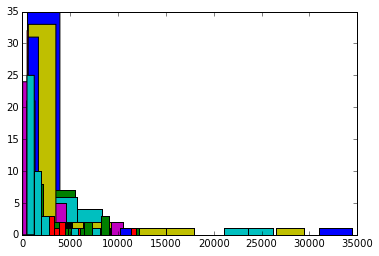

In [21]:
for e in get_ident_rt(mydict,'low00')[1]:
    hist(get_ident_rt(mydict,'low00')[1][e])

## Get Data for all conditions

In [22]:
def get_ident_cond_rt(d):
    d_conds = {'up10':{}, 'low10':{}, 'up00':{}, 'low00':{} }
    d_names = ['up10','low10','up00','low00']
    i = 0
    for c in d_names:
        d_conds[d_names[i]] = get_ident_rt(d,d_names[i])[0]
        i += 1
    return pd.DataFrame(d_conds)

Example:

In [23]:
get_ident_cond_rt(mydict)

,low00,low10,up00,up10
m00,1078.60,1029.60,1005.90,1006.90
m01,1120.05,1116.40,962.45,1138.70
m02,1129.15,1113.45,971.30,961.80
m03,1302.00,931.40,936.05,858.10
m04,959.05,1077.65,1010.75,816.70
m05,1523.25,1298.45,890.25,898.75
m06,1279.25,1281.30,894.05,999.50
m07,1210.80,1145.20,882.00,799.85
m08,1241.20,1108.95,990.30,834.70
m09,999.15,1091.20,971.20,805.60


## Make Whole Sample:

In [24]:
def make_ident_rt_sample(VpList):
    # make the first subject to establish the df-structure

    df = get_ident_cond_rt(get_ident_data(VpList[0]))
    df.index = [["p001"]*len(df), df.index ]
    
    # make the rest of the sample
    for vp_nr in range(1,len(VpList)):
        # make the following subjects
        this_vp = get_ident_cond_rt(get_ident_data(VpList[vp_nr]))
        
        # get the naming of the subject right
        if vp_nr < 10-1:
            this_vp.index = [["p00"+str(vp_nr+1) ]*len(this_vp), this_vp.index ]
        if vp_nr >=10-1:
            this_vp.index = [[ "p0"+str(vp_nr+1) ]*len(this_vp), this_vp.index ]

        # add this subject to sample-df
        df = pd.concat([df,this_vp])

    # finalising the df
    df.index.names = ['p','grade']
    df.columns = ['fearLOW','angerLOW','fearUP','angerUP']
    
    return df

In [25]:
#os.chdir('../Exp2/')

ident_rt_df = make_ident_rt_sample(IdentList)
ident_rt_df

fearLOW  angerLOW   fearUP  angerUP
p    grade                                     
p001 m00    1078.60   1029.60  1005.90  1006.90
     m01    1120.05   1116.40   962.45  1138.70
     m02    1129.15   1113.45   971.30   961.80
     m03    1302.00    931.40   936.05   858.10
     m04     959.05   1077.65  1010.75   816.70
     m05    1523.25   1298.45   890.25   898.75
     m06    1279.25   1281.30   894.05   999.50
     m07    1210.80   1145.20   882.00   799.85
     m08    1241.20   1108.95   990.30   834.70
     m09     999.15   1091.20   971.20   805.60
     m10     983.20    929.05   866.80   811.30
p002 m00    1000.15   1156.10  1620.65  1551.10
     m01    1389.15    919.75  1677.60  1584.45
     m02    1116.60    963.85  1242.90  1584.40
     m03     931.25    909.05  1631.15  1343.55
     m04    1130.30   1184.35  2152.30  1630.40
     m05    1592.30   1067.70  2043.05  1372.55
     m06     984.70    992.50  2072.15  1250.50
     m07     902.75   1163.45  1501.85  1442.50
     m08     983.50   1011.25  1596.55  1259.40
     m09     900.25    969.40  2052.60  1503.10
     m10     863.15    937.85  1391.35  1427.20
p003 m00    1990.95   1882.00  1555.40  1972.50
     m01    1552.65   2270.60  1772.95  1675.95
     m02    2322.00   2471.15  1651.85  1530.30
     m03    2282.40   2556.60  1969.75  1648.40
     m04    2116.40   2022.25  1907.90  1663.85
     m05    2546.90   2408.50  1594.05  1806.55
     m06    2603.35   2049.15  1924.05  1538.65
     m07    2168.45   2808.65  1868.55  1620.15
     m08    1924.30   1416.55  1519.20  1361.30
     m09    1566.45   1624.35  2363.30  1873.35
     m10    1539.95   1336.25  2462.70  1774.90
p004 m00    1055.75   1019.55  1142.25  1000.35
     m01     994.15   1079.25  1099.35  1108.80
     m02    1081.90    949.75  1200.70  1139.75
     m03    1074.65   1182.35  1295.05   904.80
     m04    1219.90   1110.25  1303.40  1076.60
     m05    1113.75   1224.40  1179.50  1180.40
     m06    1015.45   1017.20  1227.20  1047.25
     m07    1085.80    853.45  1095.65  1047.10
     m08    1057.30   1050.10  1065.00   975.60
     m09     895.00    956.35   995.25  1124.75
     m10     929.20    929.40  1093.30  1040.20
p005 m00    1127.00   1092.05   998.80   982.00
     m01    1198.35    937.30  1141.05   971.65
     m02    1000.90   1311.80  1033.70   886.65
     m03    1039.40   1098.75  1067.35   900.65
     m04    1873.35   1050.85   977.30   885.70
     m05    1568.85   1603.35  1150.55   911.40
     m06    1619.05   1315.20  1023.90   899.25
     m07    1771.25   1026.00  1329.55   856.00
     m08    1158.10   1129.70  1214.45   874.65
     m09    1305.90    887.85  1033.55   946.80
     m10     980.20    921.75  1132.20   911.05
p006 m00     768.65    817.80   739.90   980.10
     m01     824.20    865.50  1025.75   899.45
     m02     815.90    914.25   855.10   802.25
     m03     766.85   1006.35   811.15   719.15
     m04     764.95    858.55   786.95   901.25
     m05     850.00    829.90   827.45   770.85
     m06     751.80    819.80   817.50   803.25
     m07     864.55    750.00   850.65   783.90
     m08     775.90    789.45   996.80   927.20
     m09     811.95    878.65   899.25   726.00
     m10     759.20    878.00   891.05   926.90
p007 m00     865.20    788.60   767.25   812.35
     m01     705.50    791.35   855.15   712.65
     m02     748.45    653.35   700.55   770.20
     m03     770.15    756.60   627.55   702.25
     m04     755.85    903.35   780.35   784.55
     m05     836.20    805.75   776.60   746.80
     m06     882.25   1053.50   745.25   728.45
     m07     783.35    861.40   742.35   743.20
     m08     798.80    766.95   711.65   783.35
     m09     848.05    751.20   770.80   722.20
     m10     958.75    761.85   735.60   659.85
p008 m00    1103.70   1140.05  1359.65  1210.95
     m01    1016.75   1040.35  1035.50  1226.40
     m02    1400.75    995.90  1009.10  1344.05
     m03    1364.75   1039.05  1237.15  1065.75
     m04    1263.10   1287.7

In [26]:
ident_rt_between_df = ident_rt_df.unstack('grade')
rev_ident_rt_between_df = pd.concat([ident_rt_between_df[0:13], ident_rt_between_df[14:] ])

In [27]:
rev_ident_rt_between_df

fearLOW                                                                 \
grade      m00      m01      m02      m03      m04      m05      m06      m07   
p                                                                               
p001   1078.60  1120.05  1129.15  1302.00   959.05  1523.25  1279.25  1210.80   
p002   1000.15  1389.15  1116.60   931.25  1130.30  1592.30   984.70   902.75   
p003   1990.95  1552.65  2322.00  2282.40  2116.40  2546.90  2603.35  2168.45   
p004   1055.75   994.15  1081.90  1074.65  1219.90  1113.75  1015.45  1085.80   
p005   1127.00  1198.35  1000.90  1039.40  1873.35  1568.85  1619.05  1771.25   
p006    768.65   824.20   815.90   766.85   764.95   850.00   751.80   864.55   
p007    865.20   705.50   748.45   770.15   755.85   836.20   882.25   783.35   
p008   1103.70  1016.75  1400.75  1364.75  1263.10  1332.50  1160.95  1235.40   
p009   1403.60  1423.50  1365.15  1700.35  1384.95  1596.05  1459.15  1448.55   
p010   1029.85  1099.70   957.15  1073.80  1059.70  1269.50  1278.95  1104.55   
p011   1227.40  1139.25  1212.95  1090.80  1893.35  1422.05  1277.95  1205.90   
p012    907.55   971.15   915.20  1002.75  1005.65  1175.45  1051.35  1149.30   
p013    989.60   824.65   794.35   821.00   843.25  1066.95   963.20   979.55   
p015    825.05   748.15   809.45   782.80   765.50   796.85   878.50   816.05   
p016   1161.75  1112.35  1276.10  1170.75  1134.60  1404.80  1345.70  1238.25   
p017   1028.10  1140.90  1003.20   939.20   950.95   982.45   955.95   967.30   
p018   1197.55  1178.30  1306.35  1395.60  1295.45  1459.95  1517.55  1436.80   
p019    818.05   932.00   987.25   836.95   830.20   899.25  1016.30   831.95   
p020   1268.40  1107.35  1121.30  1247.20  1123.50  1123.25  1035.00  1297.40   
p021    916.30   827.90   856.05   871.70  1034.90  1115.65  1199.80  1244.70   
p022    756.15   719.10   857.00   716.15   755.90   717.95   797.05   774.60   
p023    972.15   915.80  1080.05  1126.00  1120.65  1106.35  1442.80  1416.10   
p024   1079.30  1058.15  1062.30  1311.30  1172.75  1540.55  1289.40  1225.70   
p025   1327.15  1403.60  1479.35  1488.55  1643.00  1548.15  1453.10  1700.55   
p026   1392.55  1371.75  1473.95  1485.25  1459.50  2056.45  1631.65  1713.75   
p027    755.60   801.20   787.20   852.15   903.10   802.50   799.45   996.45   
p028   1316.70  1271.10  1324.60  1690.85  1838.10  1872.45  1659.25  1216.50   
p029   1265.45  1266.60  1328.75  1173.80  1530.70  1541.85  1564.95  1505.55   
p030    925.80   949.35   954.15  1207.25  1136.65  1303.60  1150.25  1100.25   

                                 angerLOW                                      \
grade      m08      m09      m10      m00      m01      m02      m03      m04   
p                                                                               
p001   1241.20   999.15   983.20  1029.60  1116.40  1113.45   931.40  1077.65   
p002    983.50   900.25   863.15  1156.10   919.75   963.85   909.05  1184.35   
p003   1924.30  1566.45  1539.95  1882.00  2270.60  2471.15  2556.60  2022.25   
p004   1057.30   895.00   929.20  1019.55  1079.25   949.75  1182.35  1110.25   
p005   1158.10  1305.90   980.20  1092.05   937.30  1311.80  1098.75  1050.85   
p006    775.90   811.95   759.20   817.80   865.50   914.25  1006.35   858.55   
p007    798.80   848.05   958.75   788.60   791.35   653.35   756.60   903.35   
p008   1075.95  1097.45  1152.25  1140.05  1040.35   995.90  1039.05  1287.75   
p009   1471.40  1360.75  1353.55  1657.50  1690.75  1255.40  1412.30  1411.20   
p010   1102.80  1141.70  1196.50   916.65  1099.95   959.35  1019.80   956.25   
p011   1235.30  1015.05   911.20  1135.15   992.10  1056.35  1227.25  1517.75   
p012   1059.25  1023.75   871.20  1007.25   992.65   944.05  1150.10   993.90   
p013    944.25  1160.25  1129.80   887.45   853.25   862.95  1011.25   821.50   
p015    836.80   719.30   729.25   775.30   751.55   739.75   741.10   766.10   
p016   2157.10  1044.25  1202.55  101

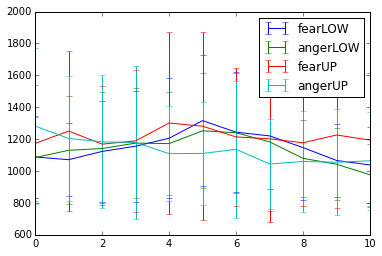

In [28]:
for cond in rev_ident_rt_between_df.columns.levels[0]:
    errorbar(range(len(rev_ident_rt_between_df[cond].mean())),
             rev_ident_rt_between_df[cond].mean(),
             rev_ident_rt_between_df[cond].std(),
             label=cond)
legend(loc='best')
show()

## Save df to file

In [29]:
savePandas(my_folder,ident_rt_between_df,'Exp2RtMedianAll.txt')
savePandas(my_folder,rev_ident_rt_between_df,'Exp2RtMedian.txt')